<a href="https://colab.research.google.com/github/MSURENDRAN/AIML_Machine_Learning_Lab/blob/main/2348527_Lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import cv2
path = '/content/drive/MyDrive/Colab Notebooks/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [6]:
X_updated = X.reshape(len(X), -1)

In [7]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

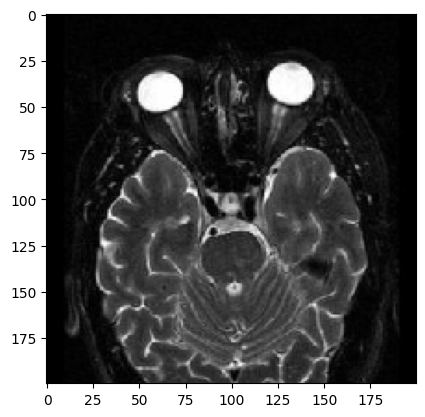

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.svm import SVC

In [14]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [15]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9928352098259979
Testing Score: 0.9755102040816327


In [16]:
pred = sv.predict(xtest)

In [17]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 12,  51, 120, 171, 192, 202]),)

In [18]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[81],ytest[81])

Total Misclassified Samples:  6
0 0


In [19]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

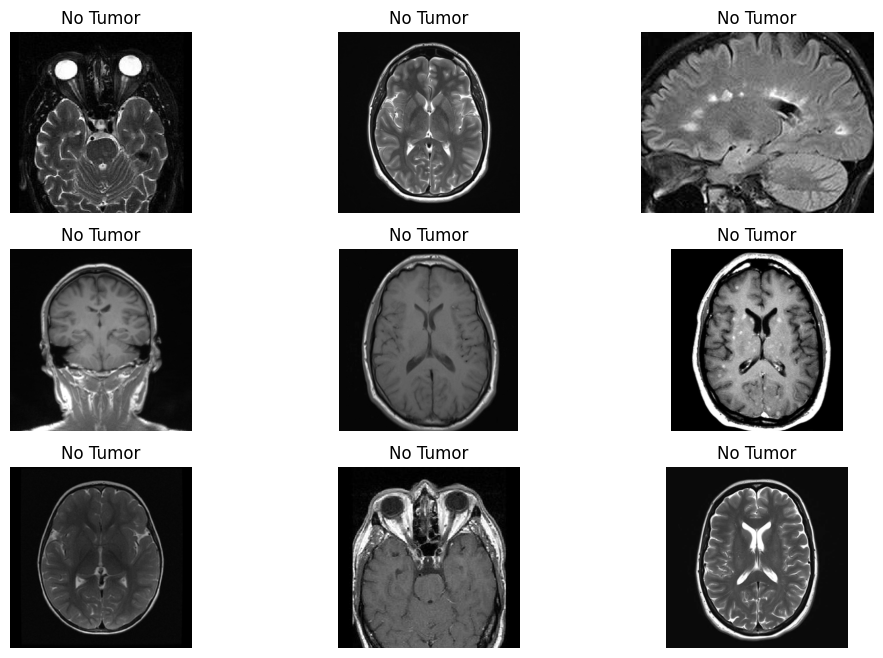

In [20]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/Colab Notebooks/Training/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

In [21]:
from sklearn.metrics import\
accuracy_score, precision_score, recall_score, f1_score,\
roc_curve, PrecisionRecallDisplay, classification_report
print('the precision score is',precision_score(ytest, pred))
print('the recall score is',recall_score(ytest, pred))
print('the f1-score is',f1_score(ytest, pred))

the precision score is 0.9647058823529412
the recall score is 1.0
the f1-score is 0.9820359281437125


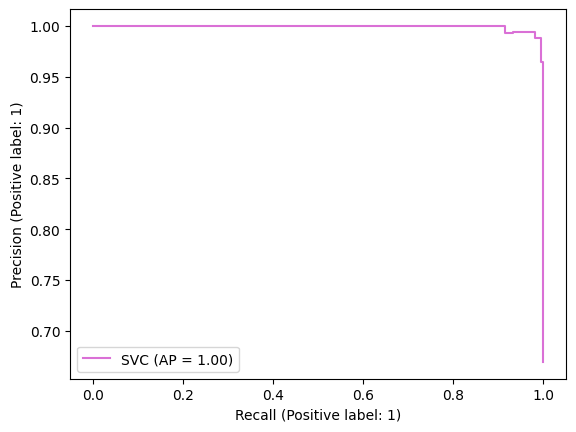

In [22]:
PrecisionRecallDisplay.from_estimator(sv, xtest, ytest, color='orchid');

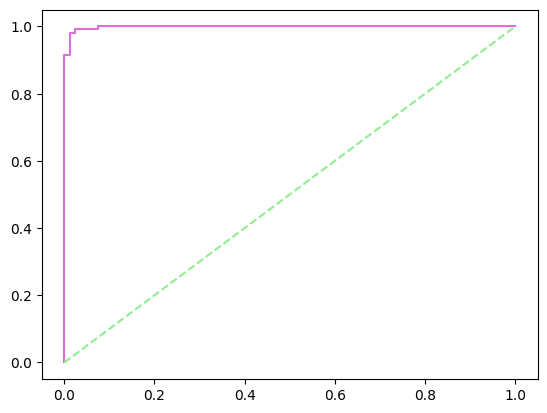

In [23]:
sv = SVC(probability=True)
sv.fit(xtrain, ytrain)
y_pred = sv.predict_proba(xtest)
fpr, tpr, thr = roc_curve(ytest, y_pred[:,1])
plt.plot(fpr, tpr, color='orchid')
plt.plot([0, 1], ls="--", color='lightgreen');

In [24]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=  15.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=  15.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.682 total time=  15.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=  15.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=  14.8s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.908 total time=   5.8s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.934 total time=   4.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.949 total time=   4.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.928 total time=   5.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.938 total time=   4.6s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.954 total time=   5.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linea

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=3)

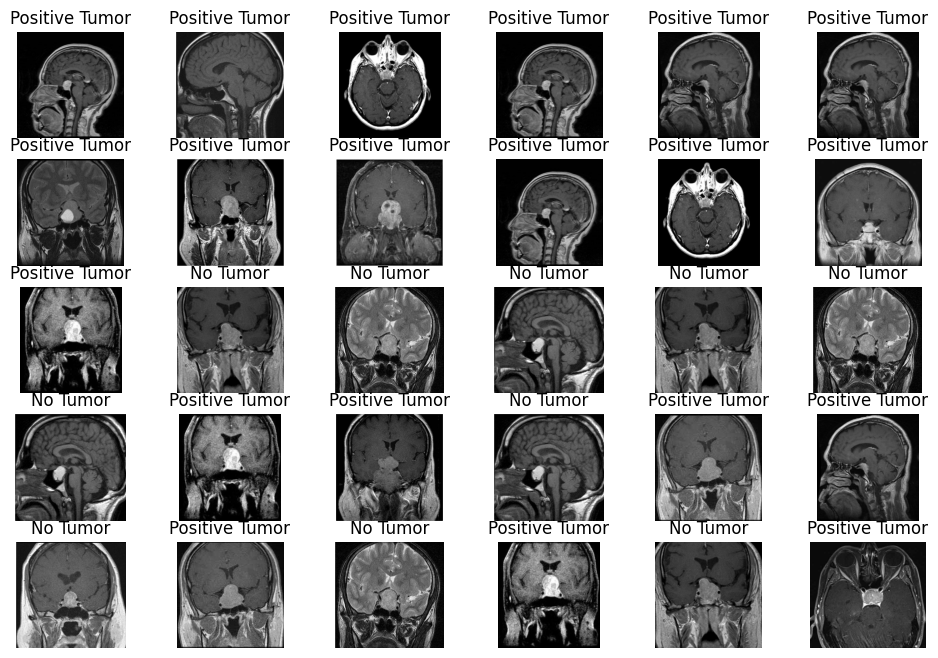

In [25]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/Colab Notebooks/Testing/pituitary_tumor'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()

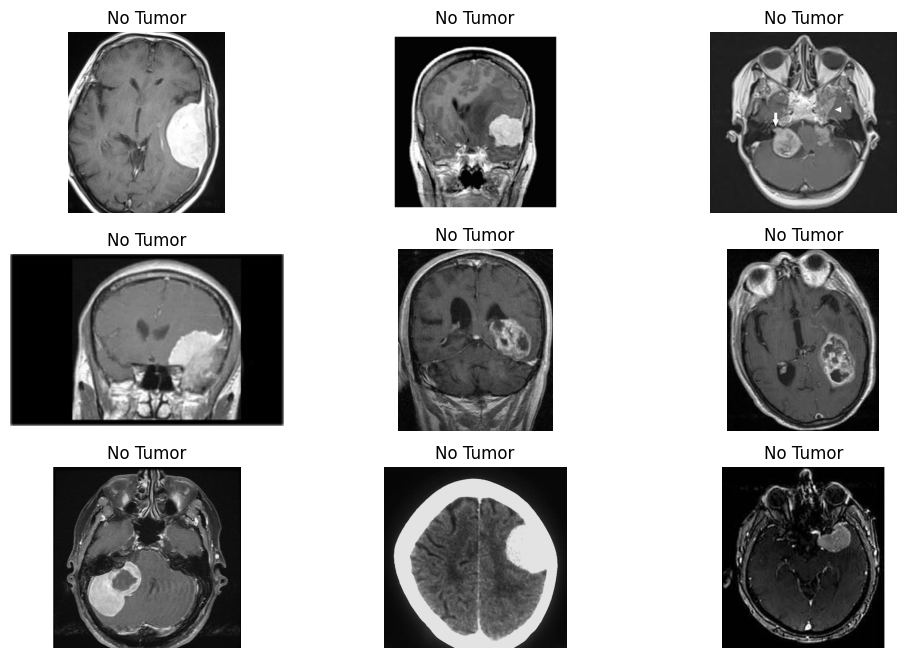

In [26]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/Colab Notebooks/Testing/meningioma_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

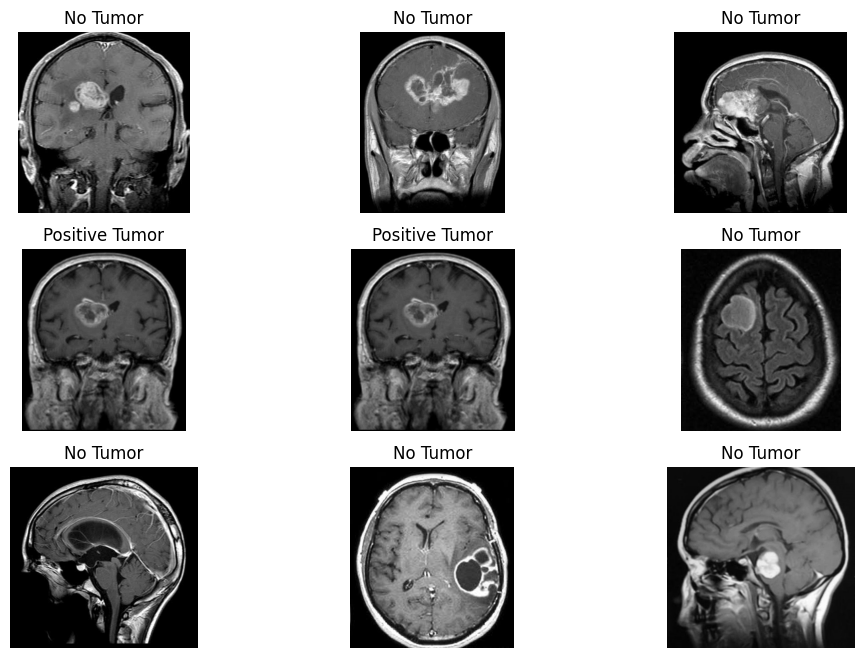

In [27]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/Colab Notebooks/Testing/glioma_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()